In [133]:
import requests
from bs4 import BeautifulSoup
import spacy
nlp = spacy.load("en_core_web_sm")
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from pattern.en import sentiment
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [93]:
r = requests.get('https://www.newsy.com/stories/commercial-companies-advance-space-exploration/')

In [94]:
html = r.text

In [95]:
soup = BeautifulSoup(html)

In [96]:
text = soup.get_text()

In [97]:
print(text)

Commercial Companies Advance Space Exploration (VIDEO)

 newsynewsU.S. NewsWORLDPoliticsScience/HealthTechBusinessEntertainmentSportsinvestigationsdocumentariesshowsschedulewhere to watchHow Commercial Companies Are Advancing Space ExplorationShareTweetEmailSMSHow Commercial Companies Are Advancing Space ExplorationBy Clayton SandellBy Clayton SandellOctober 29, 2021October 29, 2021There's competition among roughly a dozen private companies to launch new space stations.As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.Newly released video shows the 'Starship' lifting into an aerial ballet of flips and turns before landing again. SpaceX hopes the ship will reach orbit for the first time next month and maybe, one day, make founder Elon Musk's mission-to-Mars dreams a reality."He says, 'I want to die on Mars, just not on impact,'" editor for Spaceref.c

In [98]:
clear_text = text.replace("/", " ")
clear_text = clear_text.replace("\n", " ")
clear_text = clear_text.replace("\xa0", " ")
clear_text = "".join([c for c in clear_text if c!= "'"])
clear_text

'Commercial Companies Advance Space Exploration (VIDEO)   newsynewsU.S. NewsWORLDPoliticsScience HealthTechBusinessEntertainmentSportsinvestigationsdocumentariesshowsschedulewhere to watchHow Commercial Companies Are Advancing Space ExplorationShareTweetEmailSMSHow Commercial Companies Are Advancing Space ExplorationBy Clayton SandellBy Clayton SandellOctober 29, 2021October 29, 2021Theres competition among roughly a dozen private companies to launch new space stations.As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.Newly released video shows the Starship lifting into an aerial ballet of flips and turns before landing again. SpaceX hopes the ship will reach orbit for the first time next month and maybe, one day, make founder Elon Musks mission-to-Mars dreams a reality."He says, I want to die on Mars, just not on impact," editor for Spaceref.com Ke

In [99]:
sentence=[]
tokens = nlp(clear_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))
sentence[2]

'Newly released video shows the Starship lifting into an aerial ballet of flips and turns before landing again.'

In [100]:
text_sentiment = []
for s in sentence:
    t =  TextBlob(s)
    a = t.sentiment.polarity
    b = t.sentiment.subjectivity
    text_sentiment.append([s, a, b])
# print(text_sentiment)

In [101]:
Data = pd.DataFrame(text_sentiment, columns = ["Sentence", "Polarity", "Subjectivity"])

In [102]:
Data.head()

,Sentence,Polarity,Subjectivity
0,Commercial Companies Advance Space Exploration...,0.006061,0.204924
1,As astronauts blast off to the International S...,0.050000,0.750000
2,Newly released video shows the Starship liftin...,0.136364,0.454545
3,SpaceX hopes the ship will reach orbit for the...,0.125000,0.166667
4,"""He says, I want to die on Mars, just not on i...",0.000000,0.000000


In [103]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      28 non-null     object 
 1   Polarity      28 non-null     float64
 2   Subjectivity  28 non-null     float64
dtypes: float64(2), object(1)
memory usage: 800.0+ bytes


Text(0.5, 6.800000000000011, 'Sentence Polarity (Textblob)')

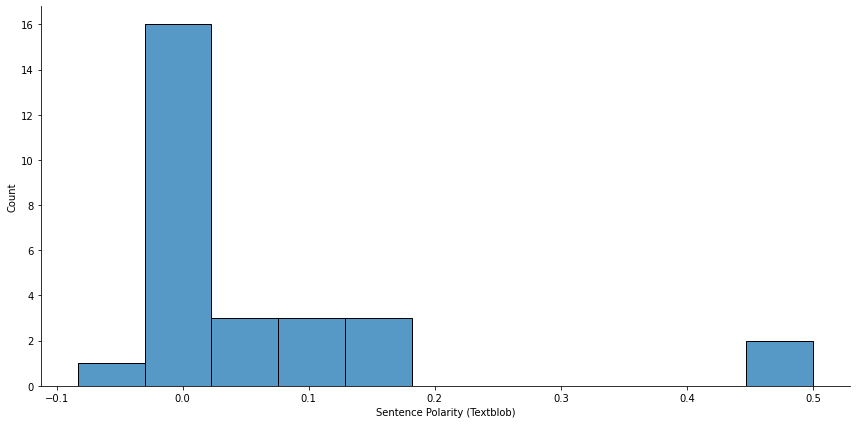

In [104]:
sns.displot(Data["Polarity"], height=6, aspect=2)
plt.xlabel("Sentence Polarity (Textblob)")

In [105]:
pattern_sentiment=[]
for s in sentence:
    txtSent= sentiment(s)
    c= txtSent[0]
    d= txtSent[1]
    pattern_sentiment.append([s,c,d])

In [106]:
pattern_sentiment[1]

['As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.',
 0.05,
 0.75]

In [107]:
DataSentiment = pd.DataFrame(pattern_sentiment, columns=["Sentence", "Polarity", "Subjectivity"])

In [108]:
DataSentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      28 non-null     object 
 1   Polarity      28 non-null     float64
 2   Subjectivity  28 non-null     float64
dtypes: float64(2), object(1)
memory usage: 800.0+ bytes


In [109]:
DataSentiment.head()

,Sentence,Polarity,Subjectivity
0,Commercial Companies Advance Space Exploration...,0.006061,0.204924
1,As astronauts blast off to the International S...,0.050000,0.750000
2,Newly released video shows the Starship liftin...,0.136364,0.454545
3,SpaceX hopes the ship will reach orbit for the...,0.125000,0.166667
4,"""He says, I want to die on Mars, just not on i...",0.000000,0.000000


Text(0.5, 6.800000000000011, 'Sentence Polarity (Pattern)')

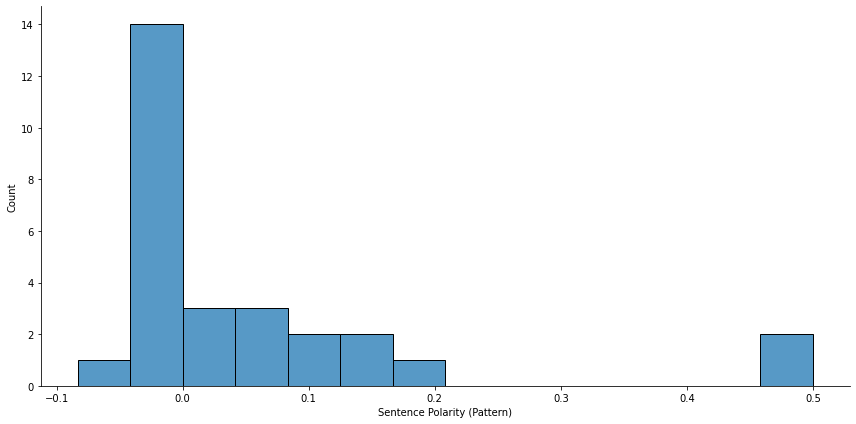

In [110]:
sns.displot(DataSentiment["Polarity"], height= 6, aspect=2)
plt.xlabel("Sentence Polarity (Pattern)")

### 

In [111]:
#Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer("\w+")

In [112]:
tokens = tokenizer.tokenize(clear_text)

In [113]:
len(tokens)

655

In [114]:
print(tokens[0:10])

['Commercial', 'Companies', 'Advance', 'Space', 'Exploration', 'VIDEO', 'newsynewsU', 'S', 'NewsWORLDPoliticsScience', 'HealthTechBusinessEntertainmentSportsinvestigationsdocumentariesshowsschedulewhere']


In [115]:
word_list = []
for word in tokens:
    word_list.append(word.lower())

In [119]:
stop_words = stopwords.words('english')

In [120]:
word_updated = []
for word in word_list:
    if word not in stop_words:
        word_updated.append(word)

In [121]:
len(word_updated)

408

In [122]:
print(word_updated[0:10])

['commercial', 'companies', 'advance', 'space', 'exploration', 'video', 'newsynewsu', 'newsworldpoliticsscience', 'healthtechbusinessentertainmentsportsinvestigationsdocumentariesshowsschedulewhere', 'watchhow']


In [127]:
freq_dist = nltk.FreqDist(word_updated)

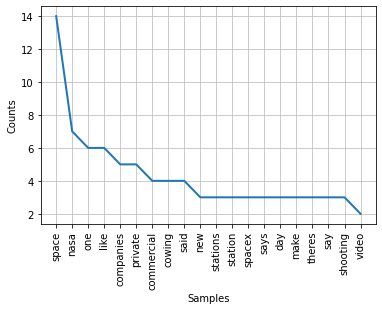

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [129]:
freq_dist.plot(20)

In [131]:
result=' '.join([i for i in word_updated if not i.isdigit()])

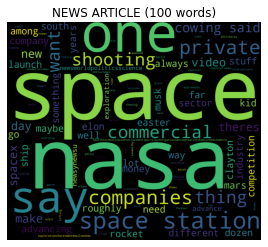

In [135]:
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(result)
plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()